In [2]:
import sys
#stdout = sys.stdout
#reload(sys)
#sys.setdefaultencoding('utf-8')
#sys.stdout = stdout

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import math
import json

# pd.options.mode.chained_assignment = None

from astropy.table import Table, Column
#from string import join
import re,pickle
from sklearn.preprocessing import label_binarize, OneHotEncoder, LabelEncoder, MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn import metrics
# imports for sklearn transformers
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin

# imports for sklearn preprocessing transformers
from sklearn.preprocessing import *

# Feature extraction packages
from sklearn.feature_extraction import *
from sklearn.feature_extraction.text import *
from collections import defaultdict
from sklearn.pipeline import Pipeline, FeatureUnion

import os
#os.environ["ML_SDK_CONF_BUCKET"]="stage-ml-platform-sdk"
#from mlsdk.MLApi import MLApi
# import seaborn as sns
# sns.set_style("dark")
# plt.rcParams['figure.figsize'] = 16, 12

In [3]:
pd.set_option('display.max_columns', 500)

# Data Loading

In [4]:
df_raw_feat_and_label = pd.read_csv('train_sample.csv', delimiter = ',', na_values = ['nan', 'NA', 'null', 'NULL'])

In [5]:
df_raw_feat_and_label.shape

(100000, 8)

In [6]:
df_raw_feat_and_label.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [131]:
df_raw_feat_and_label['is_attributed'].value_counts()/df_raw_feat_and_label.shape[0]


0    0.99773
1    0.00227
Name: is_attributed, dtype: float64

In [8]:
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000,227,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,80350,227,NaN
top,NaN,NaN,NaN,NaN,NaN,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN
freq,NaN,NaN,NaN,NaN,NaN,7,1,NaN
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,NaN,NaN,0.002270
std,69835.553661,14.94150,259.667767,55.943136,129.724248,NaN,NaN,0.047591
min,9.000000,1.00000,0.000000,0.000000,3.000000,NaN,NaN,0.000000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,NaN,NaN,0.000000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,NaN,NaN,0.000000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,NaN,NaN,0.000000


In [9]:
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null int64
app                100000 non-null int64
device             100000 non-null int64
os                 100000 non-null int64
channel            100000 non-null int64
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null int64
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [10]:
cat=['ip','app','device','os','channel','is_attributed']
for feat in cat:
    df_raw_feat_and_label[feat]=df_raw_feat_and_label[feat].astype('category')
    
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null object
attributed_time    227 non-null object
is_attributed      100000 non-null category
dtypes: category(6), object(2)
memory usage: 4.2+ MB


In [11]:
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000,100000,100000,100000,100000,100000,227,100000
unique,34857,161,100,130,161,80350,227,2
top,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0
freq,669,18279,94338,23870,8114,7,1,99773


In [12]:
df_raw_feat_and_label['click_time']=pd.to_datetime(df_raw_feat_and_label['click_time'])
df_raw_feat_and_label.info()
df_raw_feat_and_label.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null datetime64[ns]
attributed_time    227 non-null object
is_attributed      100000 non-null category
dtypes: category(6), datetime64[ns](1), object(1)
memory usage: 4.2+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,0.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN


In [13]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df_raw_feat_and_label['click_part_of_day']=pd.cut(df_raw_feat_and_label['click_time'].dt.hour , bins=6, labels=labels)
df_raw_feat_and_label['click_is_weekend']=df_raw_feat_and_label['click_time'].dt.weekday.map({0:0,1:0,2:0,3:0,4:0,5:1,6:1})

In [14]:
df_raw_feat_and_label.describe(include='all')
df_raw_feat_and_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
ip                   100000 non-null category
app                  100000 non-null category
device               100000 non-null category
os                   100000 non-null category
channel              100000 non-null category
click_time           100000 non-null datetime64[ns]
attributed_time      227 non-null object
is_attributed        100000 non-null category
click_part_of_day    100000 non-null category
click_is_weekend     100000 non-null int64
dtypes: category(7), datetime64[ns](1), int64(1), object(1)
memory usage: 5.1+ MB


In [15]:
df_raw_feat_and_label['click_is_weekend']=df_raw_feat_and_label['click_is_weekend'].astype('category')
df_raw_feat_and_label.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0,100000.0,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0,6.0,1.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,0.0,2.0,0.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0,21607.0,100000.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN


In [16]:
df_raw_feat_and_label['click_time'].dt.date.unique()
# is weekend is of no use

array([datetime.date(2017, 11, 7), datetime.date(2017, 11, 9),
       datetime.date(2017, 11, 8), datetime.date(2017, 11, 6)], dtype=object)

In [35]:
pd.crosstab(df_raw_feat_and_label.app,df_raw_feat_and_label.is_attributed)

KeyError: -1

In [54]:
pd.crosstab(df_raw_feat_and_label.device,df_raw_feat_and_label.is_attributed)

is_attributed,0,1
device,,
0,489,52
1,94192,146
2,4343,2
4,2,1
5,7,0
6,7,1
7,2,0
9,1,0
11,1,0


In [18]:
pd.crosstab(df_raw_feat_and_label.channel,df_raw_feat_and_label.is_attributed)

is_attributed,0,1
channel,,
3,486,2
4,1,0
5,2,5
13,67,0
15,2,0
17,115,0
18,25,0
19,678,0
21,161,19


In [33]:
df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')[(df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')['counts']==0) & (df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')['is_attributed']==1)]

,app,is_attributed,counts


In [34]:
df_raw_feat_and_label.groupby(['app','is_attributed']).size().reset_index(name='counts')

,app,is_attributed,counts
0,1,0,3135
1,2,0,11737
2,3,0,18275
3,3,1,4
4,4,0,58
5,5,0,174
6,5,1,14
7,6,0,1303
8,7,0,981
9,8,0,2000


In [36]:
df_raw_feat_and_label.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,3,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,4,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,5,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,2,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,3,0


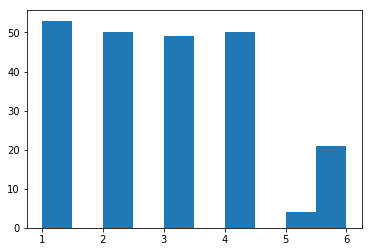

In [43]:
from matplotlib import pyplot
plt.hist(df_raw_feat_and_label['click_part_of_day'][df_raw_feat_and_label['is_attributed']==1])
#plt.hist(df_raw_feat_and_label['is_attributed'])
plt.show()

In [44]:
df_raw_feat_and_label.groupby(['click_part_of_day','is_attributed']).size().reset_index(name='counts')

,click_part_of_day,is_attributed,counts
0,1,0,21105
1,1,1,53
2,2,0,21557
3,2,1,50
4,3,0,20247
5,3,1,49
6,4,0,21413
7,4,1,50
8,5,0,8037
9,5,1,4


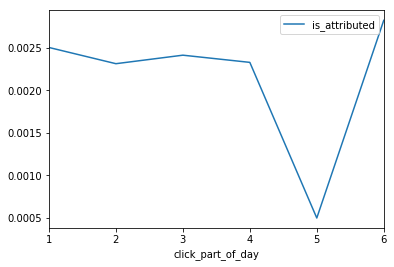

In [138]:
df_raw_feat_and_label['click_part_of_day']=df_raw_feat_and_label['click_part_of_day'].astype('category')
df_raw_feat_and_label['is_attributed']=df_raw_feat_and_label['is_attributed'].astype('int64')
df_raw_feat_and_label[['click_part_of_day','is_attributed']].groupby('click_part_of_day').mean().plot()

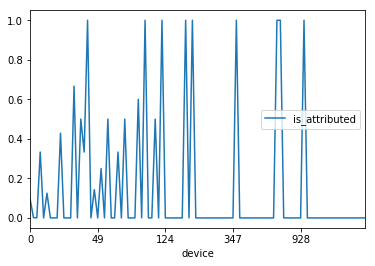

In [137]:
df_raw_feat_and_label[['device','is_attributed']].groupby('device').mean().plot()

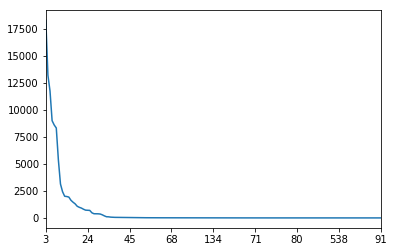

In [200]:
df_raw_feat_and_label['app'].value_counts().plot()

In [216]:
app_prcnt=pd.DataFrame(df_raw_feat_and_label['app'].value_counts()/df_raw_feat_and_label.shape[0])
type(app_prcnt)
app_prcnt=app_prcnt.reset_index()

In [228]:
app_to_be_bucketed=pd.DataFrame(app_prcnt[app_prcnt['app']<0.001]['index'])
app_to_be_bucketed['app_new']='less_app'
app_to_be_bucketed.columns=['app','app_new']
app_to_be_bucketed.describe()
app_to_be_bucketed.head()

,app,app_new
31,150,less_app
32,4,less_app
33,47,less_app
34,56,less_app
35,35,less_app


In [222]:
type(app_to_be_bucketed)

pandas.core.series.Series

In [374]:
x=df_raw_feat_and_label

In [352]:
s=CombineTail('app','app_new')

In [353]:
s.fit(x)

CombineTail(a='app', b='app_new')

In [356]:
x=s.transform(x)

In [357]:
x.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend,click_weekday
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.000000,100000.0,100000.0,100000.000000
unique,34857.0,32.0,100.0,130.0,161.0,80350,227,NaN,6.0,1.0,NaN
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN,2.0,0.0,NaN
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,NaN,21607.0,100000.0,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002270,NaN,NaN,1.861460
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047591,NaN,NaN,0.889266
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000


In [366]:
transformer_list=[]
a=['app','device','ip','os','channel']
b=['app_new','device_new','ip_new','os_new','channel_new']

for i in range(5):
    transformer_list.append((a[i],Pipeline(
        [
            ( 'Combine',CombineTail(a[i],b[i])),
        ])))
    
    
all_feature_processor=FeatureUnion(transformer_list=transformer_list)

In [367]:
print(transformer_list)

[('app', Pipeline(memory=None, steps=[('Combine', CombineTail(a='app', b='app_new'))])), ('device', Pipeline(memory=None,
     steps=[('Combine', CombineTail(a='device', b='device_new'))])), ('ip', Pipeline(memory=None, steps=[('Combine', CombineTail(a='ip', b='ip_new'))])), ('os', Pipeline(memory=None, steps=[('Combine', CombineTail(a='os', b='os_new'))])), ('channel', Pipeline(memory=None,
     steps=[('Combine', CombineTail(a='channel', b='channel_new'))]))]


In [368]:
print(all_feature_processor)

FeatureUnion(n_jobs=1,
       transformer_list=[('app', Pipeline(memory=None, steps=[('Combine', CombineTail(a='app', b='app_new'))])), ('device', Pipeline(memory=None,
     steps=[('Combine', CombineTail(a='device', b='device_new'))])), ('ip', Pipeline(memory=None, steps=[('Combine', CombineTail(a='ip', b='ip_new'))])), ('os', Pipeline(memory=None, steps=[('Combine', CombineTail(a='os', b='os_new'))])), ('channel', Pipeline(memory=None,
     steps=[('Combine', CombineTail(a='channel', b='channel_new'))]))],
       transformer_weights=None)


In [369]:
all_feature_processor.fit(x)
x=all_feature_processor.transform(x)

In [371]:
x=pd.DataFrame(x)
x.describe(include='all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
count,100000,100000,100000,100000,100000,100000,227,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,227,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,227,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,227,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,227,100000,100000,100000,100000
unique,34857,32,100,130,161,80350,227,2,6,1,4,34857,161,6,130,161,80350,227,2,6,1,4,24,161,100,130,161,80350,227,2,6,1,4,34857,161,100,48,161,80350,227,2,6,1,4,34857,161,100,130,94,80350,227,2,6,1,4
top,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0,2,0,2,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0,2,0,2,less_ip,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0,2,0,2,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0,2,0,2,5348,3,1,19,280,2017-11-08 12:01:02,2017-11-07 23:11:40,0,2,0,2
freq,669,18279,94338,23870,8114,7,1,99773,21607,100000,34035,669,18279,94338,23870,8114,7,1,99773,21607,100000,34035,94976,18279,94338,23870,8114,7,1,99773,21607,100000,34035,669,18279,94338,23870,8114,7,1,99773,21607,100000,34035,669,18279,94338,23870,8114,7,1,99773,21607,100000,34035


In [375]:
a=['app','device','ip','os','channel']
b=['app_new','device_new','ip_new','os_new','channel_new']

for i in range(5):
    a[i]=CombineTail(a[i],b[i])
    a[i].fit(x)
    x=a[i].transform(x)
    
    


In [376]:
x.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend,click_weekday
count,100000,100000.0,100000.0,100000.0,100000.0,100000,227,100000.000000,100000.0,100000.0,100000.000000
unique,24,32.0,6.0,48.0,94.0,80350,227,NaN,6.0,1.0,NaN
top,less_ip,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN,2.0,0.0,NaN
freq,94976,18279.0,94338.0,23870.0,8114.0,7,1,NaN,21607.0,100000.0,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002270,NaN,NaN,1.861460
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047591,NaN,NaN,0.889266
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000


In [270]:


def combine(x,z,p):
    q=pd.DataFrame(x[z].value_counts()/x.shape[0]).reset_index()
    y=pd.DataFrame(q[q[z]<0.001]['index'])
    y[p]='less_'+ z
    y.columns=[z,p]
    x_tmp=pd.merge(x, y, how='left', on=z)
    x_tmp[p]=x_tmp[p].fillna(x_tmp[z])
    x_tmp[z]=x_tmp[p]
    x_tmp=x_tmp.drop(p,axis=1)
    return  x_tmp
    

In [271]:
a=['app','device','ip','os','channel']
b=['app_new','device_new','ip_new','os_new','channel_new']
for i in range(5):
    x=combine(x,a[i],b[i])

In [273]:
x.describe(include='all')


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend,click_weekday
count,100000,100000.0,100000.0,100000.0,100000.0,100000,227,100000.000000,100000.0,100000.0,100000.000000
unique,24,32.0,6.0,48.0,94.0,80350,227,NaN,6.0,1.0,NaN
top,less_ip,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN,2.0,0.0,NaN
freq,94976,18279.0,94338.0,23870.0,8114.0,7,1,NaN,21607.0,100000.0,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002270,NaN,NaN,1.861460
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047591,NaN,NaN,0.889266
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000


In [268]:
x.describe(include='all')

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,click_part_of_day,click_is_weekend,click_weekday
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.000000,100000.0,100000.0,100000.000000
unique,34857.0,32.0,100.0,130.0,161.0,80350,227,NaN,6.0,1.0,NaN
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-07 23:11:40,NaN,2.0,0.0,NaN
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,NaN,21607.0,100000.0,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002270,NaN,NaN,1.861460
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047591,NaN,NaN,0.889266
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000


In [364]:
class MissingValueImputerWithValue(BaseEstimator, TransformerMixin):
     
    def __init__(self, value = 0):
        self.value = value
        
    def transform(self, X):
        return X.fillna(self.value) 
   
    def fit(self, X, y=None):
        return self
    
    
class DFSubsetSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, cols):
        self.cols = cols
        
    def transform(self, X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class CombineTail(BaseEstimator, TransformerMixin):
    def __init__(self, a,b):
        self.a=a
        self.b=b
        
    def fit(self,x,y=None):
        q=pd.DataFrame(x[self.a].value_counts()/x.shape[0]).reset_index()
        self.y=pd.DataFrame(q[q[self.a]<0.001]['index'])
        self.y[self.b]='less_'+ self.a
        self.y.columns=[self.a,self.b]
        return self
    
    def transform(self,x):
        self.x_tmp=pd.merge(x, self.y, how='left', on=self.a)
        self. x_tmp[self.b]=self.x_tmp[self.b].fillna(self.x_tmp[self.a])
        self.x_tmp[self.a]=self.x_tmp[self.b]
        self.x_tmp=self.x_tmp.drop(self.b,axis=1)
        x=self.x_tmp
        return x
        
        
        
        
        
        
        
       
        
    

class CatToOnehot(BaseEstimator, TransformerMixin):
    
    def __init__(self, col=None):
        self.lenc = LabelEncoder()
        self.ohenc = OneHotEncoder()
        self.col = col
        
    def fit(self, s, y=None):
        self.lenc.fit(s)
        self.derived_feat_name = [self.col+"_"+str(l) for l in list(self.lenc.classes_)]
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        self.ohenc.fit(x_tmp)
        return self

    def transform(self, s):
        x_tmp = np.array(self.lenc.transform(s), ndmin = 2).T
        return self.ohenc.transform(x_tmp)
    



In [146]:
cat=['app','ip','device','os','click_part_of_day']

transformer_list = []

for feat in cat:
    transformer_list.append((feat, Pipeline(
                        [
                            ('Selector' , DFSubsetSelector([feat])),('OneHot' , CatToOnehot(feat)),
                        ])))
                            
                            
                            
all_feature_extractor_preprocessor=FeatureUnion(transformer_list=transformer_list)

In [158]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,VotingClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb

learner = LogisticRegression()
#learner2 = RandomForestClassifier(n_jobs=-1,random_state=0,verbose=1,n_estimators=200)
#learner3 = LogisticRegression(n_jobs=-1)

#learner = VotingClassifier([('lr1',learner1),('lr2',learner2),('lr3',learner3)],voting='soft')
#from sklearn.linear_model import LogisticRegression

# Train test split
df_train, df_test, y_train, y_test = model_selection.train_test_split(df_raw_feat_and_label, df_raw_feat_and_label['is_attributed'], test_size = 0.0001, random_state=12, stratify = df_raw_feat_and_label['is_attributed'])

In [159]:
df_train.shape, df_test.shape,y_train.shape, y_test.shape

((99990, 10), (10, 10), (99990,), (10,))

In [193]:
df_train['is_attributed'].value_counts()

0    99763
1      227
Name: is_attributed, dtype: int64

In [161]:
df_test['is_attributed'].value_counts()

0    10
Name: is_attributed, dtype: int64

In [194]:
all_feature_extractor_preprocessor.fit(df_train, y_train)
X_train=all_feature_extractor_preprocessor.transform(df_train)


C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label

In [155]:
X_test=all_feature_extractor_preprocessor.transform(df_test)
#hold this

C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains new labels: [ 96 116 123 163 176 267 347 398 407 425 536 548]

In [163]:
X_train.shape

(99990, 35254)

In [164]:
print(X_train.shape,X_test.shape)

(99990, 35254) (20000, 6)


In [165]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [166]:
learner.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
y_train_pred=learner.predict(X_train)
print(metrics.classification_report(y_train,y_train_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99763
          1       0.96      0.11      0.20       227

avg / total       1.00      1.00      1.00     99990



In [168]:
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)

[[99762     1]
 [  201    26]]


In [171]:
rf=RandomForestClassifier(n_jobs=-1, random_state=0, n_estimators=200)


In [172]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

[[99763     0]
 [    1   226]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     99763
          1       1.00      1.00      1.00       227

avg / total       1.00      1.00      1.00     99990

0.997797356828


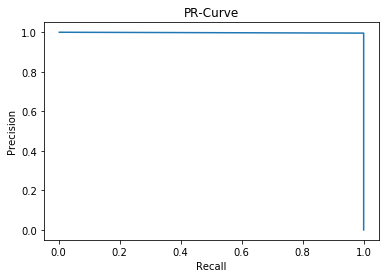

In [176]:
y_train_pred=rf.predict(X_train)
confusion_matrix_train=confusion_matrix(y_train,y_train_pred)
print(confusion_matrix_train)
print(metrics.classification_report(y_train,y_train_pred))
prec,rec,thres=metrics.precision_recall_curve(y_train,y_train_pred)
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train,y_train_pred))

# Main train sample load

In [119]:
df=pd.read_csv('train.csv')

In [183]:
df_sample=df.sample(100000)

In [184]:
df_sample.shape

(100000, 8)

In [185]:
df_sample['is_attributed'].value_counts()/df_sample.shape[0]

0    0.99791
1    0.00209
Name: is_attributed, dtype: float64

In [186]:
cat=['ip','app','device','os','channel']
for feat in cat:
    df_sample[feat]=df_sample[feat].astype('category')
    
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 17117058 to 15011724
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null object
attributed_time    209 non-null object
is_attributed      100000 non-null int64
dtypes: category(5), int64(1), object(2)
memory usage: 16.6+ MB


In [187]:
df_sample['click_time']=pd.to_datetime(df_sample['click_time'])
df_sample.info()
df_sample.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 17117058 to 15011724
Data columns (total 8 columns):
ip                 100000 non-null category
app                100000 non-null category
device             100000 non-null category
os                 100000 non-null category
channel            100000 non-null category
click_time         100000 non-null datetime64[ns]
attributed_time    209 non-null object
is_attributed      100000 non-null int64
dtypes: category(5), datetime64[ns](1), int64(1), object(1)
memory usage: 16.6+ MB


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,209,100000.000000
unique,34799.0,160.0,97.0,120.0,161.0,80285,209,NaN
top,5348.0,3.0,1.0,19.0,280.0,2017-11-09 14:29:31,2017-11-07 10:38:00,NaN
freq,680.0,18395.0,94330.0,23858.0,8211.0,5,1,NaN
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 15:26:02,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:58,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002090
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045669
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [188]:
#get weekday part of day from click time
import time
import datetime as dt
from datetime import date
#df_raw_feat_and_label['click_hour']=df_raw_feat_and_label['click_time'].dt.hour 
#df_raw_feat_and_label['click_time'].dt.weekday
labels=[1,2,3,4,5,6]
df_sample['click_part_of_day']=pd.cut(df_sample['click_time'].dt.hour , bins=6, labels=labels)
df_sample['click_weekday']=df_sample['click_time'].dt.weekday

In [192]:
cat=['app','ip','device','os','click_part_of_day']

transformer_list = []

for feat in cat:
    transformer_list.append((feat, Pipeline(
                        [
                            ('Selector' , DFSubsetSelector([feat])),('OneHot' , CatToOnehot(feat)),
                        ])))
                            
                            
                            
all_feature_extractor_preprocessor=FeatureUnion(transformer_list=transformer_list)

In [198]:
all_feature_extractor_preprocessor.fit(df_sample)
X_train_sample=all_feature_extractor_preprocessor.transform(df_sample)
y_train_sample=df_sample['is_attributed']

C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\priyanshu.raj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label

In [199]:
y_train_pred_samp=rf.predict(X_train_sample)
confusion_matrix_train=confusion_matrix(y_train_sample,y_train_pred_samp)
print(confusion_matrix_train)
print(metrics.classification_report(y_train_sample,y_train_pred_samp))
prec,rec,thres=metrics.precision_recall_curve(y_train_sample,y_train_pred_samp)
plt.plot(prec,rec)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR-Curve')
print(metrics.roc_auc_score(y_train_sample,y_train_pred_samp))

ValueError: Number of features of the model must match the input. Model n_features is 35254 and input n_features is 35182 

In [ ]:
# Train test split
df_train, df_test, y_train, y_test = model_selection.train_test_split(df_raw_feat_and_label, df_raw_feat_and_label['is_attributed'], test_size = 0.2, random_state=12, stratify = df_raw_feat_and_label['is_attributed'])